<a href="https://colab.research.google.com/github/weihanchen/google-colab-python-learn/blob/main/jupyter-examples/pandas/pandas_group_reshape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【Google Colab Python系列】 資料處理神器 Pandas 分組與重朔之術(Grouping/Reshaping)

過往我們有介紹了「[【Google Colab Python系列】 資料處理神器 Pandas 起手式](https://www.potatomedia.co/s/pYiFElO)」， 相信對於pandas的基本操作具有一定的基礎知識了， 主要著重在基本的操作， 讓我們快速篩選與分析資料， 但真實的世界是有可能具有很多類型的資料集分別儲存， 而不同的資料集又具有一些相似度， 需要進行更進階的分割與合併，讓零散的「資料」變成黃金。

## 分組(Grouping)

分組的用意在於將一大筆原始資料根據相似群組進行分類，進而統計， 最終產生該群組的一組樣本數據資料，嗯...，相信看到這裡心裡難免會說「能不能說點人話？」， 的確，就字面解釋確實不太容易理解，那我們就以一個較貼近生活化的例子來輔助說明看看吧！

假設我們是咖啡廳的老闆，我們有一份銷售表格，記錄著每一位員工每天的銷售額，其中包含員工姓名、銷售日期、銷售金額..

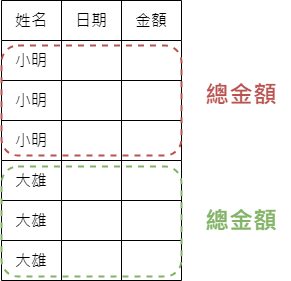

In [1]:
import pandas as pd

data = {
    '姓名': ['小明', '小華', '小明', '小華', '小明', '小華'],
    '日期': ['2023-08-01', '2023-08-01', '2023-08-02', '2023-08-02', '2023-08-03', '2023-08-03'],
    '銷售金額': [100, 150, 120, 80, 200, 90]
}

df = pd.DataFrame(data)
print(df)


   姓名          日期  銷售金額
0  小明  2023-08-01   100
1  小華  2023-08-01   150
2  小明  2023-08-02   120
3  小華  2023-08-02    80
4  小明  2023-08-03   200
5  小華  2023-08-03    90


那麼有了這個銷售數據後，身為老闆的我們總會希望統計一下哪位員工的銷售金額比較多，績效比較好，做為評估的依據， 此時我們可以這麼做， 以「姓名」當作群組的分類標的，進而針對銷售金額進行加總， 就可以得出這批資料中，哪位員工銷售的最多...

In [2]:
total = df.groupby('姓名')['銷售金額'].sum()
print(total)


姓名
小明    420
小華    320
Name: 銷售金額, dtype: int64


當然我們群組分類的欄位也可以不只一個， 假設我們要統計每個人每天的銷售額多少時就可以這麼做...

In [3]:
total = df.groupby(['姓名', '日期'])['銷售金額'].sum()
print(total)

姓名  日期        
小明  2023-08-01    100
    2023-08-02    120
    2023-08-03    200
小華  2023-08-01    150
    2023-08-02     80
    2023-08-03     90
Name: 銷售金額, dtype: int64


## 重朔(Reshaping)

這功能主要就像是資料的變形怪一樣，它允許我們重新組織或轉換資料的形狀。

stacking、unstacking、pivot、pivot_table都是Reshaping能夠轉換的格式與方法， 就讓我們繼續看下去吧！

假設我們有一份樣本資料...

In [4]:
import pandas as pd

data = {
    '日期': ['2023-08-01', '2023-08-01', '2023-08-02', '2023-08-02'],
    '城市': ['台北', '高雄', '台北', '高雄'],
    '最高溫度': [32, 34, 33, 35],
    '最低溫度': [26, 28, 27, 29]
}

df = pd.DataFrame(data)
print(df)


           日期  城市  最高溫度  最低溫度
0  2023-08-01  台北    32    26
1  2023-08-01  高雄    34    28
2  2023-08-02  台北    33    27
3  2023-08-02  高雄    35    29


### 以pivot來實現

將城市作為欄位，日期作為索引，並將最高溫度和最低溫度分別填入對應的欄位中。

這樣的數據格式主要表示每個日期各地區的最高溫度與最低溫度。

In [5]:
reshaped_df = df.pivot(index='日期', columns='城市', values=['最高溫度', '最低溫度'])
print(reshaped_df)


           最高溫度     最低溫度    
城市           台北  高雄   台北  高雄
日期                          
2023-08-01   32  34   26  28
2023-08-02   33  35   27  29


### 我們可以用stack

讓欄位的值堆疊到日期之處，這樣的數據讓我們較方便從上往下觀察。

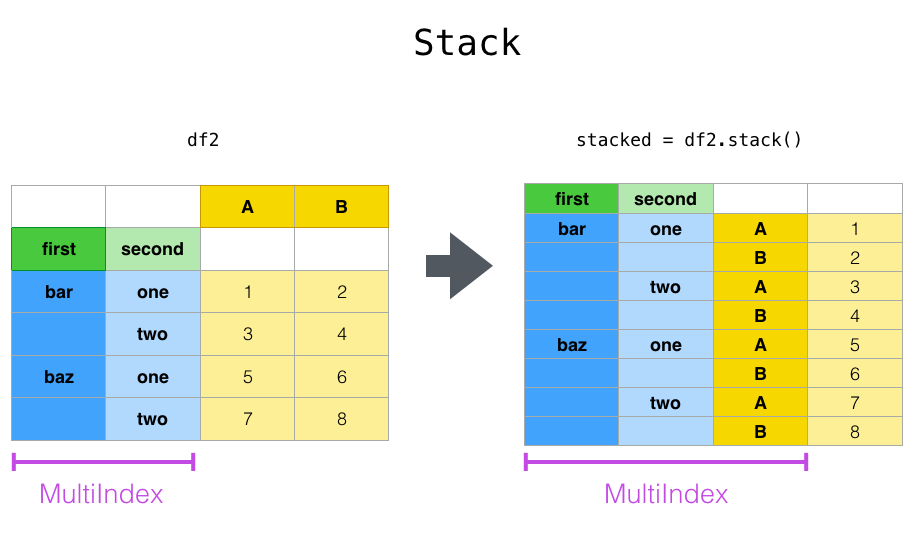

In [6]:
stacked_df = reshaped_df.stack()
print(stacked_df)


               最高溫度  最低溫度
日期         城市            
2023-08-01 台北    32    26
           高雄    34    28
2023-08-02 台北    33    27
           高雄    35    29


### 當然也可以unstack

In [7]:
unstacked_df = stacked_df.unstack()
print(unstacked_df)

           最高溫度     最低溫度    
城市           台北  高雄   台北  高雄
日期                          
2023-08-01   32  34   26  28
2023-08-02   33  35   27  29


今天的範例都在這裡「[📦 pandas/pandas_merge.ipynb](https://github.com/weihanchen/google-colab-python-learn/blob/main/jupyter-examples/pandas/pandas_group_reshape.ipynb)」歡迎自行取用。

如何使用請參閱「[【Google Colab Python系列】Colab平台與Python如何擦出火花？](https://www.potatomedia.co/s/aNLHZe3S)」。

## 結語

原來數據可以這麼玩，分組、重組不同格式都輕而易舉，靈活彈性的展示數據讓我們訓練AI的過程中更容易抓到方向。

喜歡撰寫文章的你，不妨來了解一下：

[eb3.0時代下為創作者、閱讀者打造的專屬共贏平台 — 為什麼要加入？](https://www.potatomedia.co/s/2PmFxsq)

歡迎加入一起練習寫作，賺取知識